https://www.kaggle.com/datasets/joebeachcapital/loan-default/data

Набор данных «Loan Defaults» (Неисполнение обязательств по кредиту)

Анонимные данные о дефолте кредита, включая сумму кредита, срок, процентную ставку, рассрочку, стаж работы, владение жильем, годовой до-ход, статус и цель кредита и т. д., а также двоичный код repay_fail (1 или 0).

# Import Libraries and Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<H2> Data Observation </H2>

In [6]:
data = pd.read_csv('/content/sample_data/Anonymize_Loan_Default_data.csv',encoding='latin1', index_col=0)

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38480 non-null  int64  
 1   member_id               38480 non-null  int64  
 2   loan_amnt               38479 non-null  float64
 3   funded_amnt             38479 non-null  float64
 4   funded_amnt_inv         38479 non-null  float64
 5   term                    38480 non-null  object 
 6   int_rate                38480 non-null  float64
 7   installment             38479 non-null  float64
 8   emp_length              37487 non-null  object 
 9   home_ownership          38480 non-null  object 
 10  annual_inc              38478 non-null  float64
 11  verification_status     38480 non-null  object 
 12  issue_d                 38480 non-null  object 
 13  loan_status             38480 non-null  object 
 14  purpose                 38480 non-null  obj

In [8]:
data.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
count,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480,38480.00000,38479.000000,37487,38480,...,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38409,38479.000000,3383,38477,38480.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,11,5,...,NaN,NaN,NaN,NaN,NaN,105,NaN,103,110,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,Jun-16,NaN,Jul-16,Jun-16,NaN
freq,NaN,NaN,NaN,NaN,NaN,28593,NaN,NaN,8465,18253,...,NaN,NaN,NaN,NaN,NaN,1022,NaN,909,11342,NaN
mean,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,NaN,12.16430,323.163255,NaN,NaN,...,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,NaN,2614.441757,NaN,NaN,0.151481
std,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,NaN,3.73744,209.089097,NaN,NaN,...,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,NaN,4391.969583,NaN,NaN,0.358522
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,NaN,0.00000,0.000000,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,NaN,9.62000,165.740000,NaN,NaN,...,13.000000,5463.099238,4811.735000,4400.000000,657.700000,NaN,212.010000,NaN,NaN,0.000000
50%,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,NaN,11.99000,277.980000,NaN,NaN,...,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,NaN,526.000000,NaN,NaN,0.000000
75%,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,NaN,14.72000,429.350000,NaN,NaN,...,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,NaN,3169.815000,NaN,NaN,0.000000


# Checking Null and Unique values of each column in dataset

In [9]:
data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,0
int_rate,0
installment,1
emp_length,993
home_ownership,0


In [10]:
data.nunique()

,0
id,38480
member_id,38480
loan_amnt,881
funded_amnt,1036
funded_amnt_inv,8473
term,2
int_rate,392
installment,15475
emp_length,11
home_ownership,5


# Data Prepraration

In [11]:
# Проверка на дубли
data.duplicated().sum()

np.int64(0)

In [12]:
data = data.drop(['next_pymnt_d','mths_since_last_delinq'],axis=1) # Много пропусков
data = data.drop(['member_id','id','zip_code','addr_state'],axis=1) # Не информативны

**Spliting Data for further**

In [13]:
 # Отделяем целевую переменную
df_X = data.drop('repay_fail',axis = 1)
df_y = data['repay_fail']

In [14]:
# Для графика, если понадобится
X_columns = df_X.columns

**Категориальные переменные**

In [15]:
# создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (df_X.dtypes == "object").values # категориальные признаки имеют тип "object"
cat_features_mask

array([False, False, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True])

In [16]:
X_real = df_X[df_X.columns[~cat_features_mask]]
X_cat = df_X[df_X.columns[cat_features_mask]]

In [17]:
X_cat.isnull().sum()

,0
term,0
emp_length,993
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,0
earliest_cr_line,0
revol_util,59
last_pymnt_d,71


In [18]:
X_cat = df_X[df_X.columns[cat_features_mask]].fillna('NaN')
X_cat.isnull().sum()

,0
term,0
emp_length,0
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,0
earliest_cr_line,0
revol_util,0
last_pymnt_d,0


In [19]:
df_X = pd.concat([X_real, X_cat], axis=1)

# Under-Sampling Data

,count
repay_fail,
0,32651
1,5829


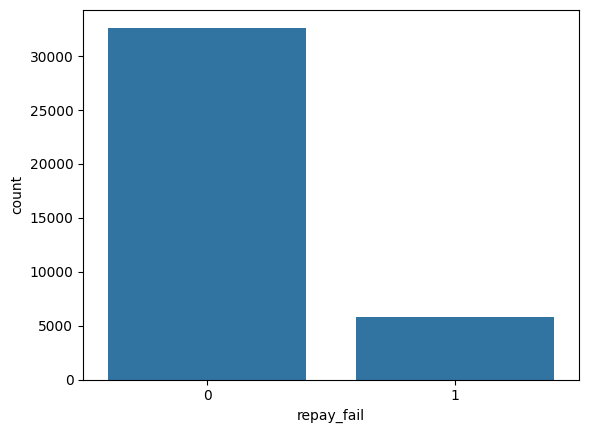

In [20]:
sns.countplot(x = data['repay_fail'])
data['repay_fail'].value_counts()

**Данные не сбалансированы**

In [21]:
#Calculating Percentage

print("Percentage of 0 is: {zero}".format(zero = round(int(data['repay_fail'].value_counts()[0]) / len(data['repay_fail'])*100,3)))
print('')
print("Percentage of 1 is: {one}".format(one = round(int(data['repay_fail'].value_counts()[1]) / len(data['repay_fail'])*100,3)))

Percentage of 0 is: 84.852

Percentage of 1 is: 15.148


In [22]:
X, y = df_X, df_y

# Data Split and Scaling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [26]:
# Если пропускаем масштабирование нужно перевести в NumPy (RobustScaler переводит в NumPy array)
X_train = X_train.values
X_test = X_test.values

# CatBoost


In [27]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [28]:
import catboost as cb

In [29]:
X_train_pd = pd.DataFrame(X_train).head()
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,3500.0,3500.0,3425.0,7.37,108.66,44496.0,13.89,0.0,2.0,14.0,...,2 years,MORTGAGE,Not Verified,Jul-09,Fully Paid,other,Dec-94,7%,Jan-10,May-12
1,12375.0,12375.0,12375.0,7.29,383.75,33000.0,21.96,0.0,2.0,12.0,...,5 years,MORTGAGE,Verified,Apr-11,Fully Paid,credit_card,Sep-01,26.90%,Jan-13,Jun-16
2,10000.0,10000.0,9975.0,11.12,218.03,36000.0,24.5,0.0,0.0,9.0,...,9 years,RENT,Verified,Aug-10,Fully Paid,debt_consolidation,Jun-02,39.70%,Dec-12,Dec-12
3,10000.0,10000.0,9975.0,9.99,322.63,45000.0,5.33,0.0,3.0,6.0,...,6 years,MORTGAGE,Not Verified,Jul-11,Fully Paid,wedding,Nov-03,54.50%,Feb-14,Jul-14
4,6000.0,6000.0,6000.0,18.39,153.64,54504.0,18.41,1.0,2.0,12.0,...,9 years,MORTGAGE,Not Verified,Jul-11,Fully Paid,debt_consolidation,Oct-00,41.10%,Jul-15,Jul-15


In [30]:
# создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (df_X.dtypes == "object").values # категориальные признаки имеют тип "object"
cat_features_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [31]:
# Категориальные фичи
X_cat = df_X[df_X.columns[cat_features_mask]]
cat_features_indices = np.where(cat_features_mask)[0] # индекс категориального признака
cat_features_indices = cat_features_indices.tolist()
cat_features_indices

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

In [32]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [33]:
# Создание модели CatBoost с учетом дисбаланса классов (class_weights)
model_cb_v2 = cb.CatBoostClassifier(cat_features=cat_features_indices,
                           iterations=1000,
                           learning_rate=0.03,
                           depth=6,
                           custom_metric=['AUC'],
                           class_weights=[100, 1]  # в 100 раз больший вес для первого класса)
                          )
# Обучение модели
model_cb_v2.fit(X_train, y_train, eval_set=(X_test, y_test))

# Получение предсказанных вероятностей для каждого класса
y_pred_proba = model_cb_v2.predict_proba(X_test)

0:	learn: 0.6025289	test: 0.6023512	best: 0.6023512 (0)	total: 161ms	remaining: 2m 40s
1:	learn: 0.4892351	test: 0.4881913	best: 0.4881913 (1)	total: 279ms	remaining: 2m 19s
2:	learn: 0.4245734	test: 0.4236112	best: 0.4236112 (2)	total: 343ms	remaining: 1m 53s
3:	learn: 0.3691638	test: 0.3681662	best: 0.3681662 (3)	total: 440ms	remaining: 1m 49s
4:	learn: 0.3209533	test: 0.3198800	best: 0.3198800 (4)	total: 521ms	remaining: 1m 43s
5:	learn: 0.2577843	test: 0.2573305	best: 0.2573305 (5)	total: 617ms	remaining: 1m 42s
6:	learn: 0.2119618	test: 0.2115047	best: 0.2115047 (6)	total: 711ms	remaining: 1m 40s
7:	learn: 0.1729425	test: 0.1727134	best: 0.1727134 (7)	total: 795ms	remaining: 1m 38s
8:	learn: 0.1523319	test: 0.1521299	best: 0.1521299 (8)	total: 814ms	remaining: 1m 29s
9:	learn: 0.1252291	test: 0.1246326	best: 0.1246326 (9)	total: 902ms	remaining: 1m 29s
10:	learn: 0.1023964	test: 0.1016881	best: 0.1016881 (10)	total: 1.01s	remaining: 1m 30s
11:	learn: 0.0913461	test: 0.0907126	best

In [34]:
# Вычисление площади под кривой точности-отзыва (AUPRC)
auprc_2 = average_precision_score(y_test, y_pred_proba[:,1])
print(f"AUPRC: {auprc_2}")

# Получение точности и отзыва для всех порогов классификации
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

AUPRC: 1.0


In [35]:
feature_importances = model_cb_v2.feature_importances_
feature_importances

array([1.67958300e-01, 2.27432722e-01, 2.51871089e-02, 6.13106718e-02,
       1.75180481e-01, 1.73111735e-01, 3.23013745e-01, 4.94094138e-02,
       1.13661875e-02, 8.34211853e-02, 1.90762637e-02, 2.45283569e-01,
       2.06402723e-01, 3.69446618e-01, 1.82340668e-01, 1.99309855e-01,
       9.49665399e-02, 2.10148875e-01, 1.34122130e-01, 2.16687565e-01,
       4.40018683e-01, 2.15249172e-01, 7.93584346e-01, 9.30046825e+01,
       3.83835630e-01, 3.29552081e-03, 5.23274015e-01, 1.17066889e+00,
       2.90214909e-01])

In [37]:
max_importance_index = np.argmax(feature_importances)
max_importance_index

np.int64(23)

В данных лик